# Lab 8 - Application to an alternative dataset

In [1]:
# As always, imports copied from lab sheet.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
# SVC meaning support vector CLASSIFIER rather than machine.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# If this import fails, run
# conda install conda-forge::imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from collections import Counter

In [2]:
df = pd.read_csv("../labData/Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
# PatientID not relevant to ML.
df.drop(columns = "patientid", axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [5]:
df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


<Axes: xlabel='gender', ylabel='count'>

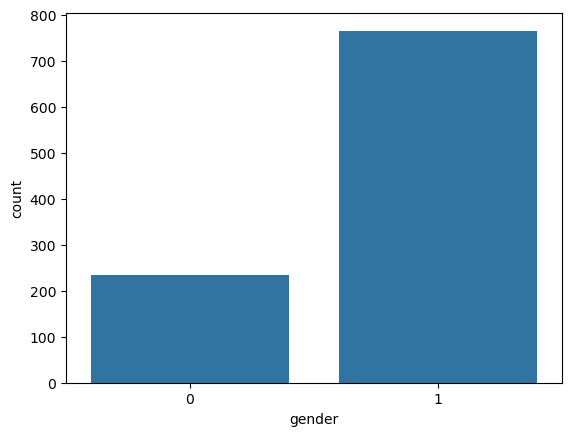

In [7]:
sns.countplot(df, x = "gender")

<Axes: xlabel='fastingbloodsugar', ylabel='count'>

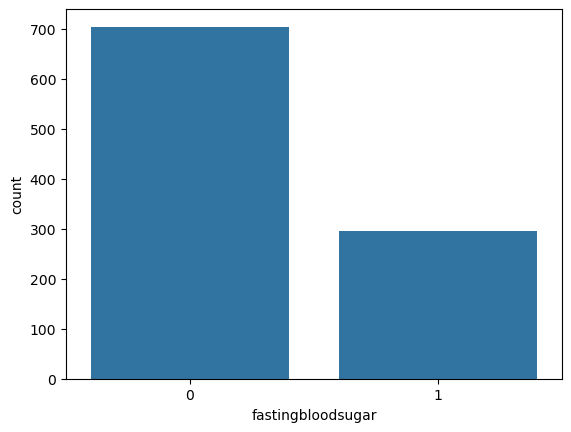

In [9]:
sns.countplot(df, x = "fastingbloodsugar")

<Axes: xlabel='target', ylabel='count'>

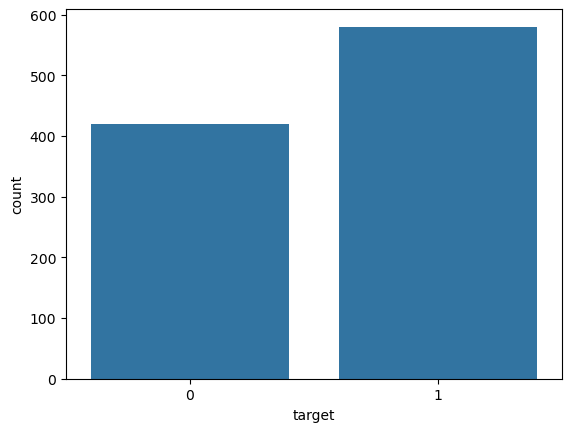

In [10]:
# Perhaps most important, let's view the distribution of the classifier.
sns.countplot(df, x = "target")

Slight imbalance, not as bad as the wine set but SMOTE probably worth? idk

In [33]:
smote = SMOTE()

In [34]:
X = df.drop(columns = "target")
y = df["target"]

In [35]:
X, y = smote.fit_resample(X, y)

In [36]:
y.value_counts()

target
1    580
0    580
Name: count, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
308,62,1,2,153,501,1,0,142,0,0.2,2,2
432,79,1,1,175,487,0,0,145,0,3.3,2,1


In [38]:
sc = StandardScaler()

In [39]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [41]:
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_pred, y_test)
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_pred, y_test)
y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_pred, y_test)

In [42]:
models = pd.DataFrame({
    "model" : ["RF", "LR", "SVM"],
    "acc" : [rf_acc, lr_acc, svm_acc]
})

models = models.sort_values(by = "acc", ascending = False)
models

,model,acc
0,RF,0.982759
2,SVM,0.974138
1,LR,0.969828


<Axes: xlabel='model', ylabel='acc'>

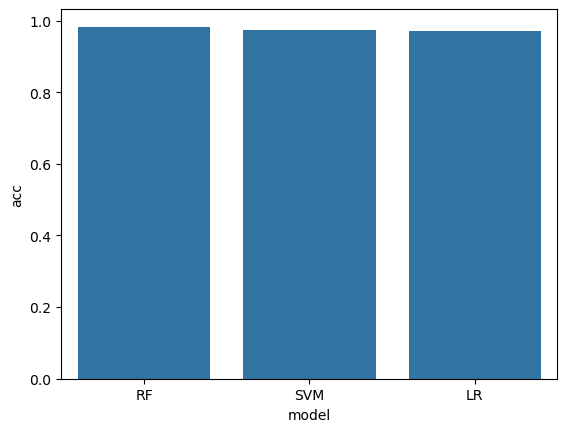

In [43]:
sns.barplot(models, x = "model", y = "acc")